In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [8]:
df=pd.read_csv('deputados.csv')
X=df.drop(['id', 'nome', 'siglaUf', 'siglaPartido', 'idLegislatura'], axis=1)

for col in X.columns:
    X[col]=X[col].astype('float')

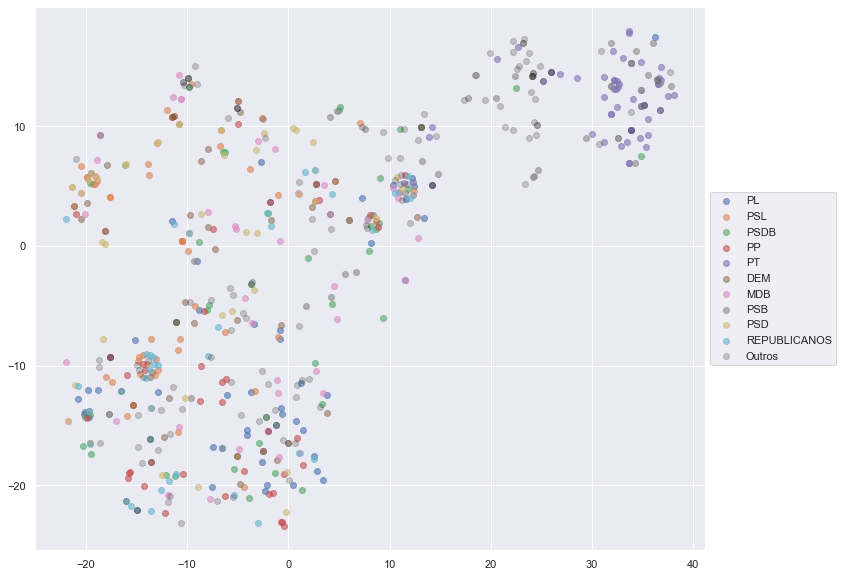

In [9]:
model = TSNE(learning_rate=20)

tsne_features = model.fit_transform(X)

xs = tsne_features[:, 0]
ys = tsne_features[:, 1]

sns.set_theme()

fig = plt.figure(figsize=[15, 10])
ax = plt.subplot(111)

maiores_partidos=df.groupby('siglaPartido').id.count().sort_values(ascending=False)[0:10].index
for c in df.siglaPartido.unique():
    if c in maiores_partidos:
        x = xs[df.siglaPartido == c]
        y = ys[df.siglaPartido == c]
        plt.scatter(x, y, alpha=0.6, label=c)
    
x = xs[[a not in maiores_partidos for a in df.siglaPartido]]
y = ys[[a not in maiores_partidos for a in df.siglaPartido]]
plt.scatter(x, y, alpha=0.2, label='Outros', c='k')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


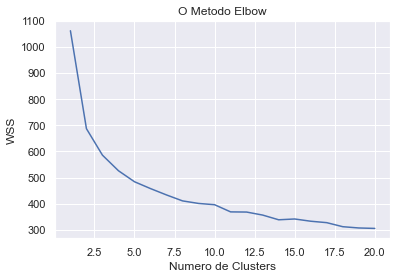

In [11]:
wcss = []
 
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 21), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') 
#plt.grid() #within cluster sum of squares
plt.show()

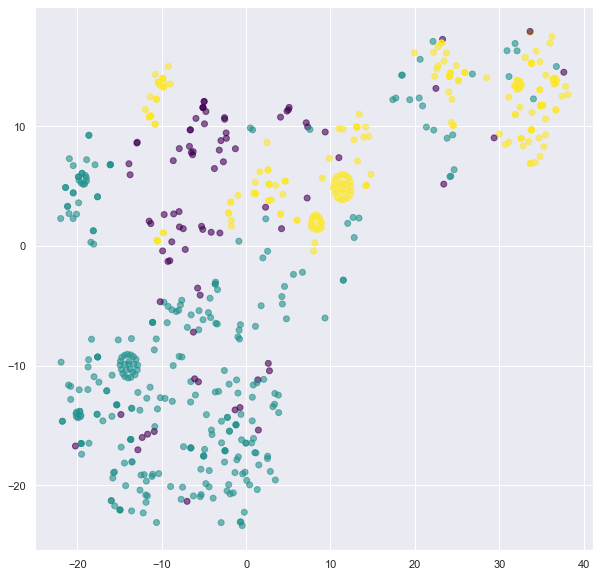

In [12]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

colors = gmm_model.predict(X)
fig = plt.figure(figsize=[10, 10])
plt.scatter(xs, ys, c=colors, cmap='viridis', alpha=0.6)
plt.show()

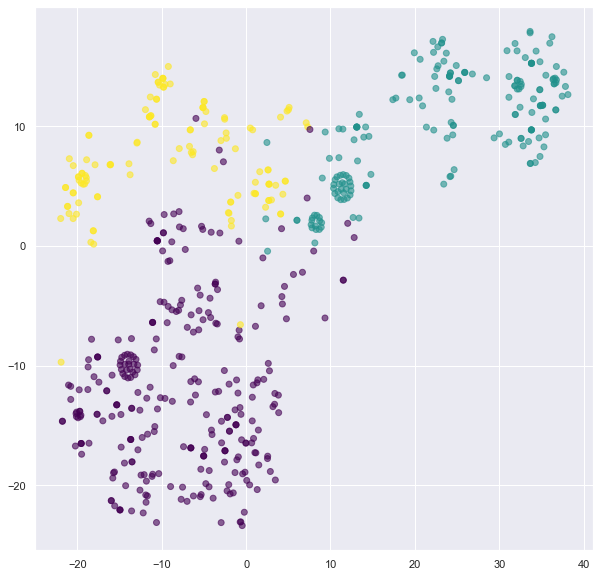

In [13]:
from sklearn.cluster import Birch

n_clusters = 3
birch = Birch(n_clusters=n_clusters)
birch.fit(X)

colors = birch.predict(X)
fig = plt.figure(figsize=[10, 10])
plt.scatter(xs, ys, c=colors, cmap='viridis', alpha=0.6)
plt.show()

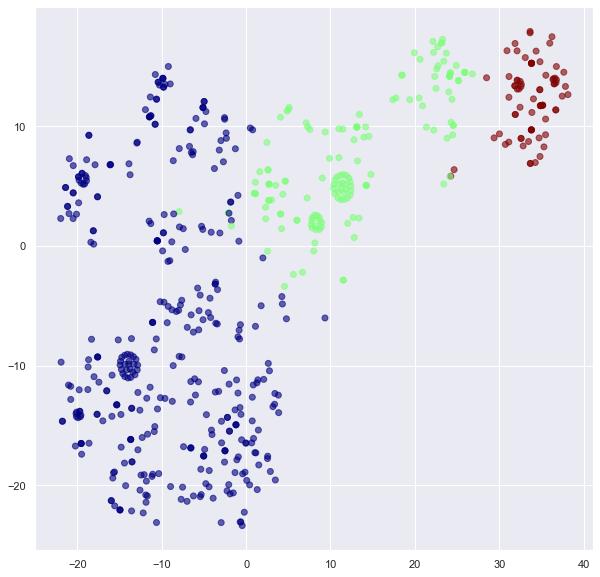

In [14]:
from sklearn.cluster import SpectralClustering

spectral_cluster_model= SpectralClustering(
    n_clusters=3, 
    random_state=42, 
    n_neighbors=15,
    affinity='nearest_neighbors',
    n_init=1250,
)
colors= spectral_cluster_model.fit_predict(X)
fig = plt.figure(figsize=[10, 10])
plt.scatter(xs, ys, c=colors, cmap='jet',  alpha=0.6)
plt.show()

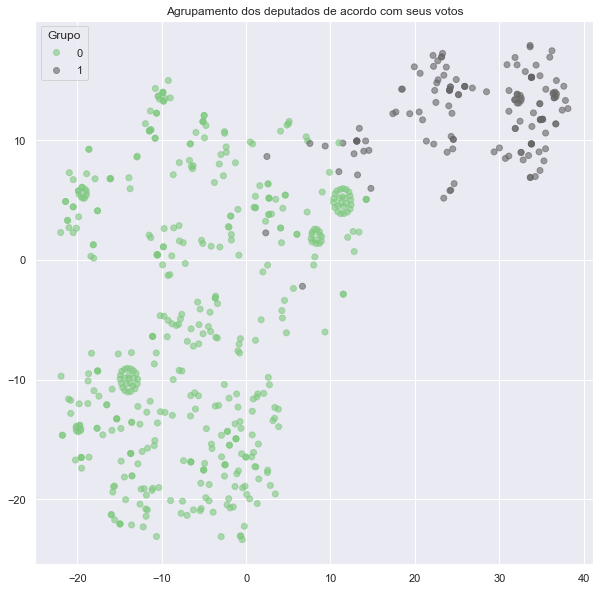

In [16]:
kmeans = KMeans(n_clusters = 2, init = 'random', n_init=1250, algorithm='elkan')
kmeans.fit(X)
colors = kmeans.labels_

fig = plt.figure(figsize=[10, 10])
scatter =plt.scatter(xs, ys, c=colors, cmap='Accent', alpha=0.6)
plt.title('Agrupamento dos deputados de acordo com seus votos')
plt.legend(*scatter.legend_elements(), title='Grupo')
plt.show()

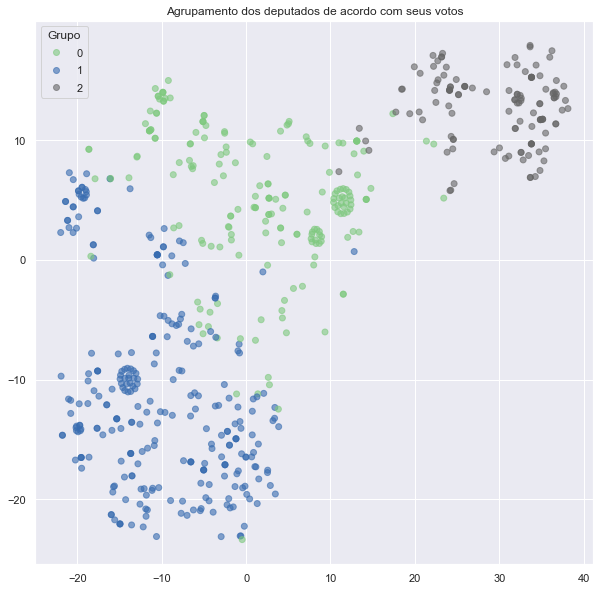

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'random', n_init=1250, algorithm='elkan')
kmeans.fit(X)
colors = kmeans.labels_

fig = plt.figure(figsize=[10, 10])
scatter =plt.scatter(xs, ys, c=colors, cmap='Accent', alpha=0.6)
plt.title('Agrupamento dos deputados de acordo com seus votos')
plt.legend(*scatter.legend_elements(), title='Grupo')
plt.show()

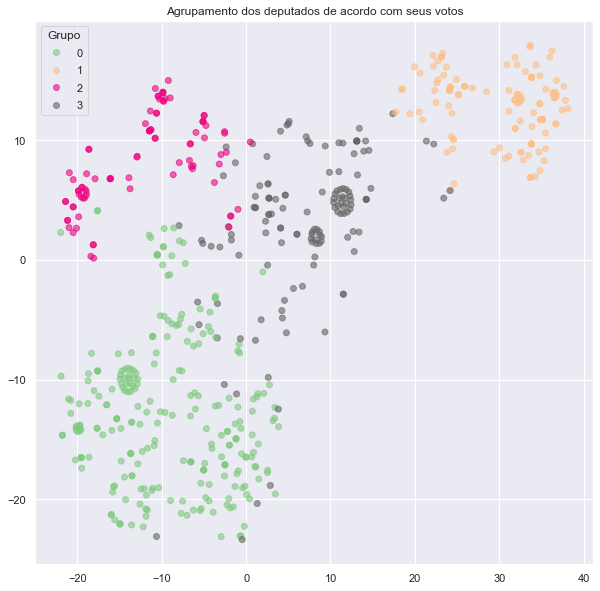

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'random', n_init=1250, algorithm='elkan')
kmeans.fit(X)
colors = kmeans.labels_

fig = plt.figure(figsize=[10, 10])
scatter =plt.scatter(xs, ys, c=colors, cmap='Accent', alpha=0.6)
plt.title('Agrupamento dos deputados de acordo com seus votos')
plt.legend(*scatter.legend_elements(), title='Grupo')
plt.show()

In [53]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, pairwise_distances

X=df.drop(['id', 'nome', 'siglaUf', 'siglaPartido', 'idLegislatura'], axis=1)

resultado = pairwise_distances(X, X.iloc[0])

print(resultado)


ValueError: Expected 2D array, got 1D array instead:
array=[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 0.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
from scipy.spatial.distance import cdist

Y = cdist(df.iloc[1], df.iloc[0], 'euclidean')

PL 2337/21      1.0
PLP 19/19       1.0
PL 591/2021     1.0
PL 3729/04      1.0
PL 3723/19      1.0
PEC 06/2019     1.0
PEC 125/2011    1.0
MP 1045/21      1.0
MP 1031/21      1.0
PL 10372/18     1.0
PEC 135/19      0.5
PEC 241/2016    0.5
Name: 0, dtype: float64
